# Explore here

Bibliotecas a importar

In [75]:
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier


from pickle import dump

from joblib import load
from joblib import dump

Subir la base de datos

In [76]:
# Paso 1: Crear carpeta para almacenar datos en crudo
os.makedirs('./data/raw', exist_ok=True)

# Paso 2: Descargar y almacenar el archivo
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
file_path = './data/raw/diabetes.csv'
df = pd.read_csv(url)

# Guardar una copia local en la carpeta indicada
df.to_csv(file_path, index=False)

# Paso 3: Cargar el conjunto de datos
# Verificamos las primeras filas para inspeccionar la estructura y composición del conjunto de datos
df = pd.read_csv(file_path)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Conociendo el Data Set

In [77]:
# Obtener las dimensiones
df.shape

(768, 9)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
#tipos de datos
tipo_de_datos = pd.DataFrame(df.dtypes)
tipo_de_datos

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


##### Diccionario de variables  
- __Pregnancies__. Número de embarazos del paciente (numérico)
- __Glucose__. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- __BloodPressure__. Presión arterial diastólica (medida en mm Hg) (numérico)
- __SkinThickness__. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- __Insulin__. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- __BMI__. Índice de masa corporal (numérico)
- __DiabetesPedigreeFunction__. Función de pedigrí de diabetes (numérico)
- __Age__. Edad del paciente (numérico)
- __Outcome__. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [81]:
# Identificar las variables numéricas
variables_numericas = df._get_numeric_data().columns
print("Las variables numéricas son:")
for var in variables_numericas:
    print(f" - {var}")


# Identificar las variables categóricas
variables_categoricas = df.select_dtypes(include=['object']).columns
print("\nLas variables categóricas son:")
for var in variables_categoricas:
    print(f" - {var}")

Las variables numéricas son:
 - Pregnancies
 - Glucose
 - BloodPressure
 - SkinThickness
 - Insulin
 - BMI
 - DiabetesPedigreeFunction
 - Age
 - Outcome

Las variables categóricas son:


#### Tratamiento de Datos

Duplicados

In [82]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"En este caso encontramos {num_duplicados} duplicados.")

En este caso encontramos 0 duplicados.


Nulos

In [83]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Entender las variables - Graficado

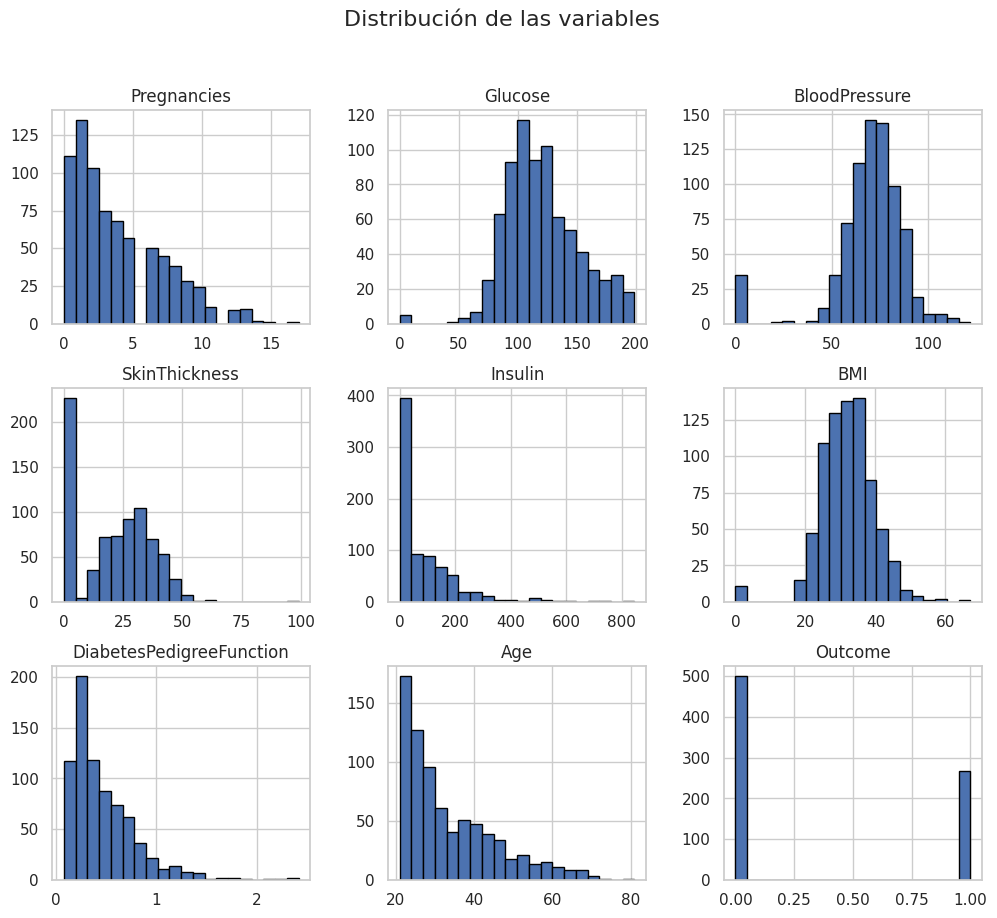

In [84]:
sns.set(style="whitegrid")

#Crear historiogramas para revisar la distribución de cada variable numérica
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()

Hay valores un tanto extraños en columnas como BloodPressure, Glucosa y BMI con valores cercanos a 0 que podrían indicar errores o en caso de BMI valores extremos de sobrepeso.

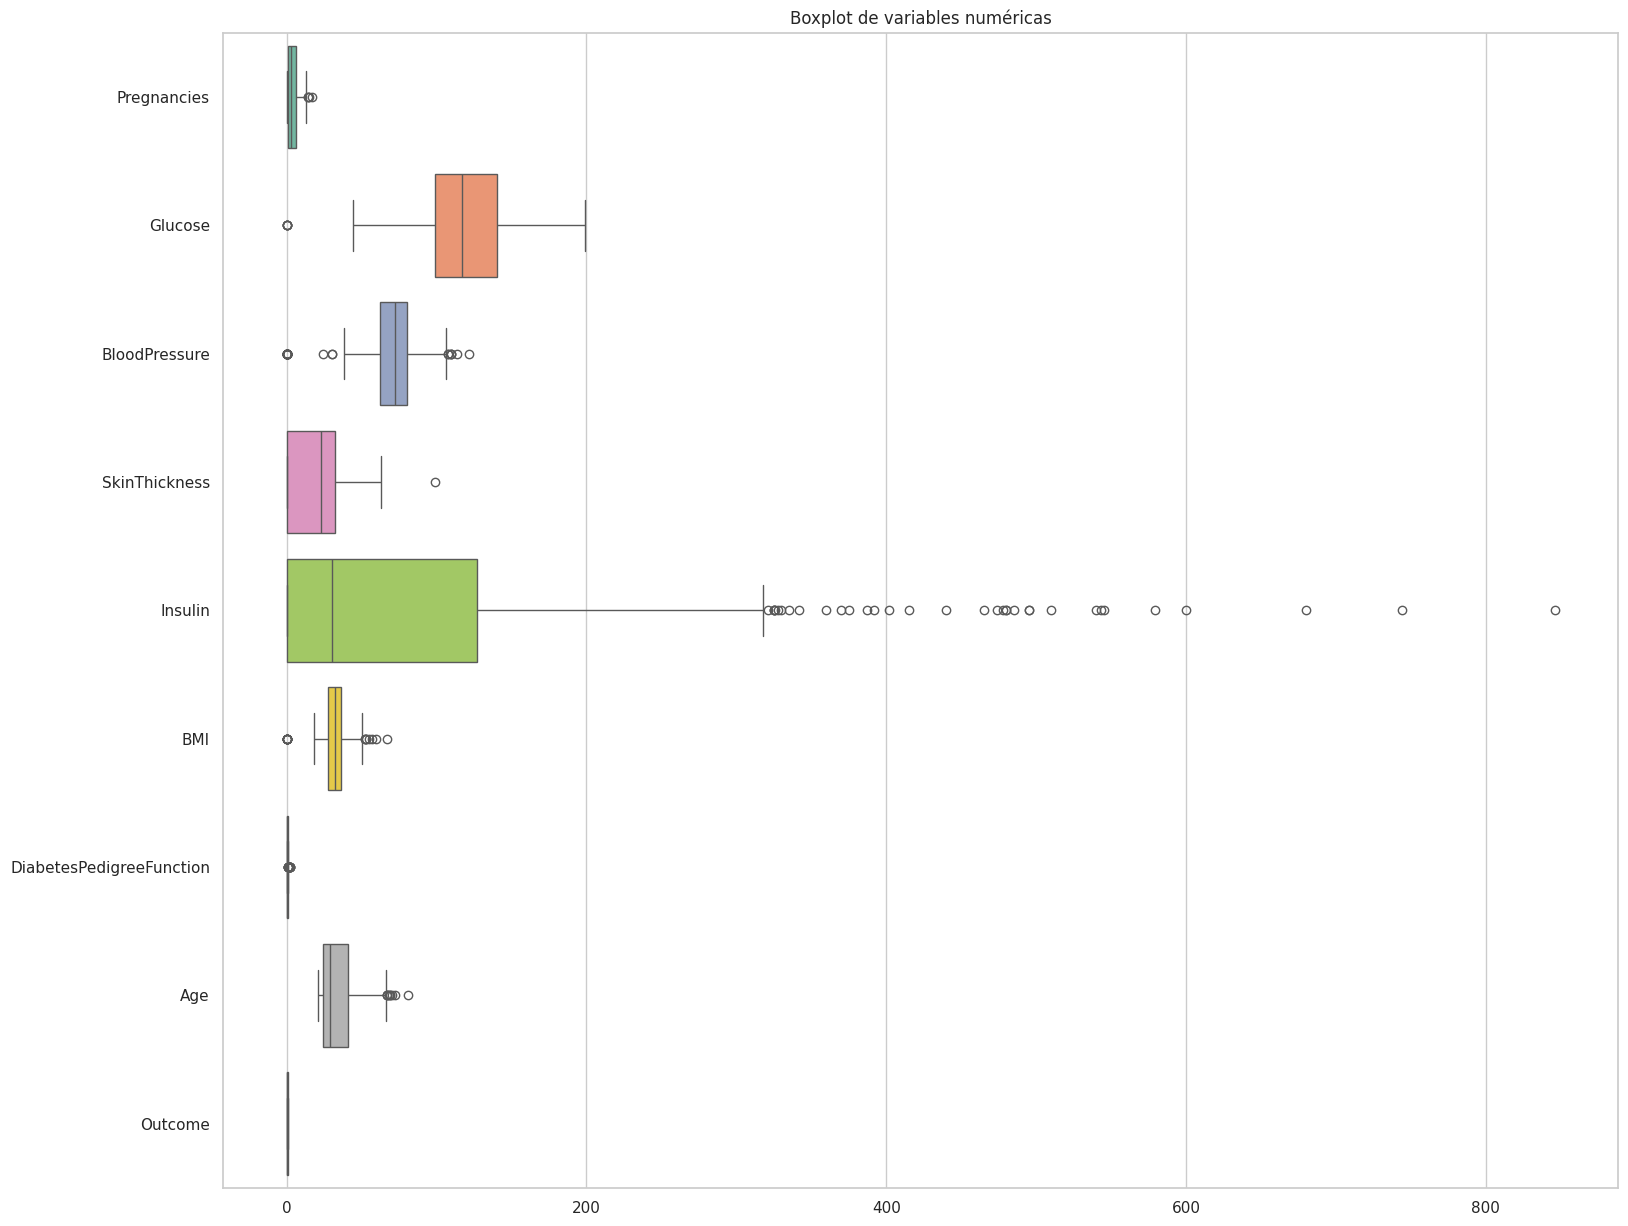

In [85]:
# Crear diagramas de caja (boxplots) para identificar valores atípicos
plt.figure(figsize=(18, 15))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot de variables numéricas")
plt.show()


Destacan valores atípicos sobretodo en insulin

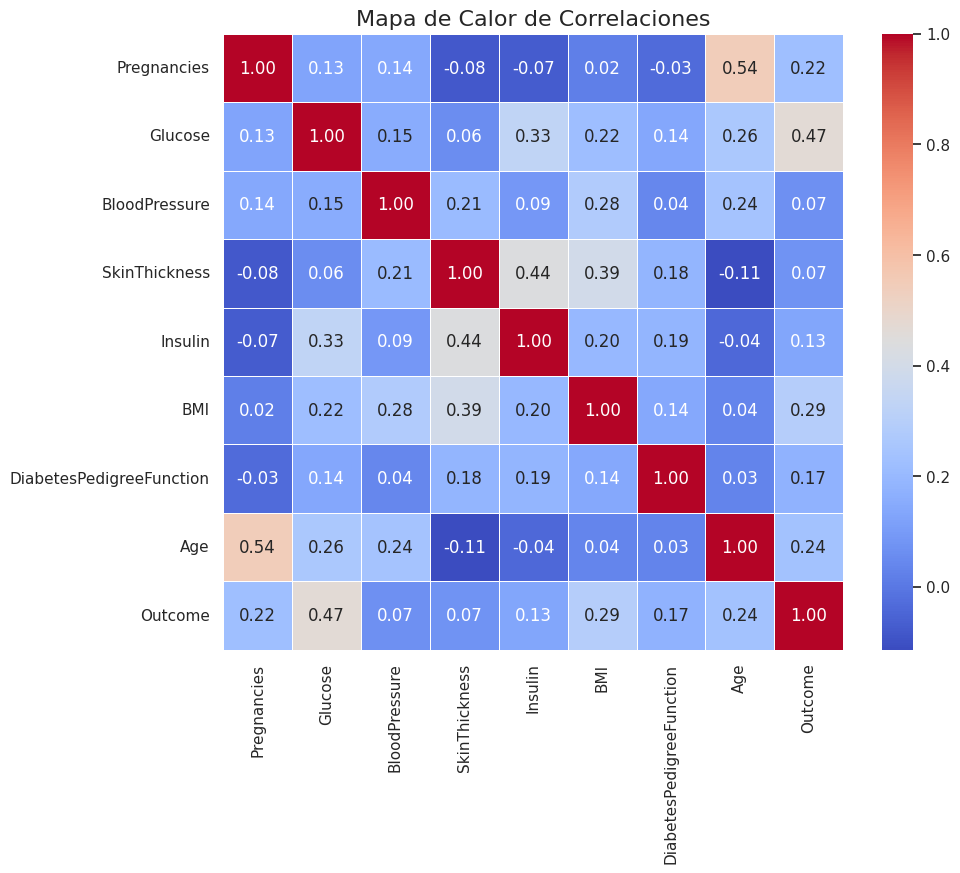

In [86]:
# Crear un mapa heatmap de correlaciones
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.show()

In [87]:
# Distribuciones de las variables separadas por clase 
columns_to_plot = ['Glucose', 'BMI', 'Age', 'Pregnancies']


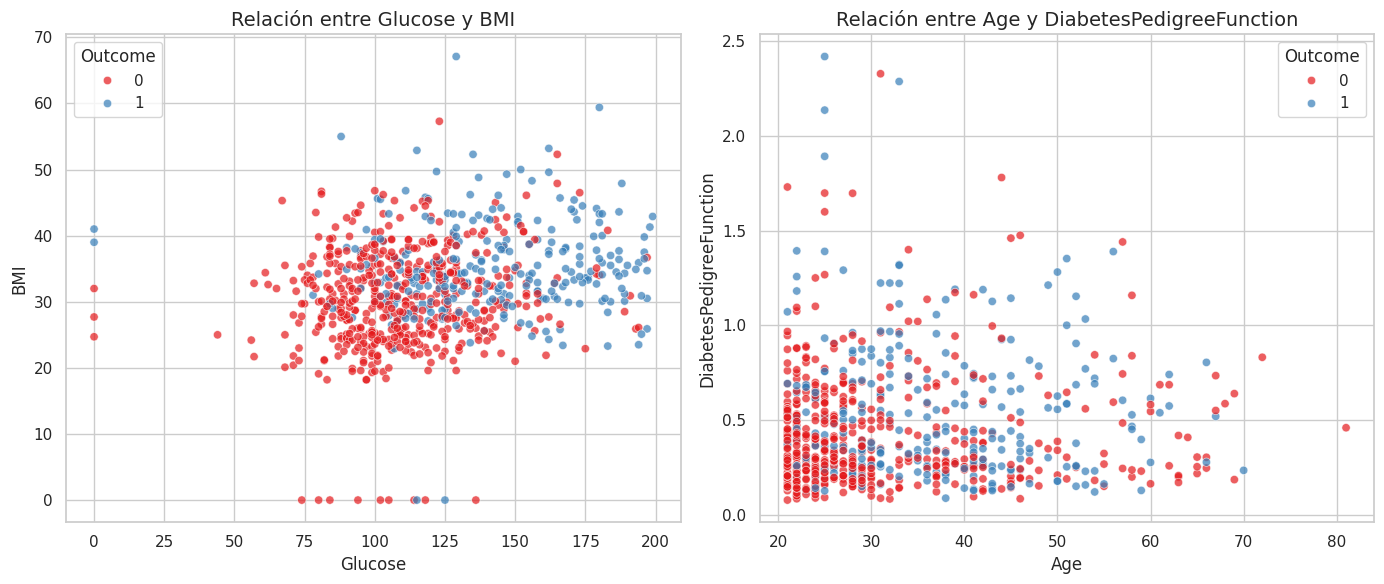

In [88]:
# Gráficos de dispersión 
scatter_columns = [('Glucose', 'BMI'), ('Age', 'DiabetesPedigreeFunction')]

plt.figure(figsize=(14, 6))
for i, (x, y) in enumerate(scatter_columns, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=df, x=x, y=y, hue='Outcome', palette="Set1", alpha=0.7)
    plt.title(f"Relación entre {x} y {y}", fontsize=14)
    plt.legend(title="Outcome")

plt.tight_layout()
plt.show()

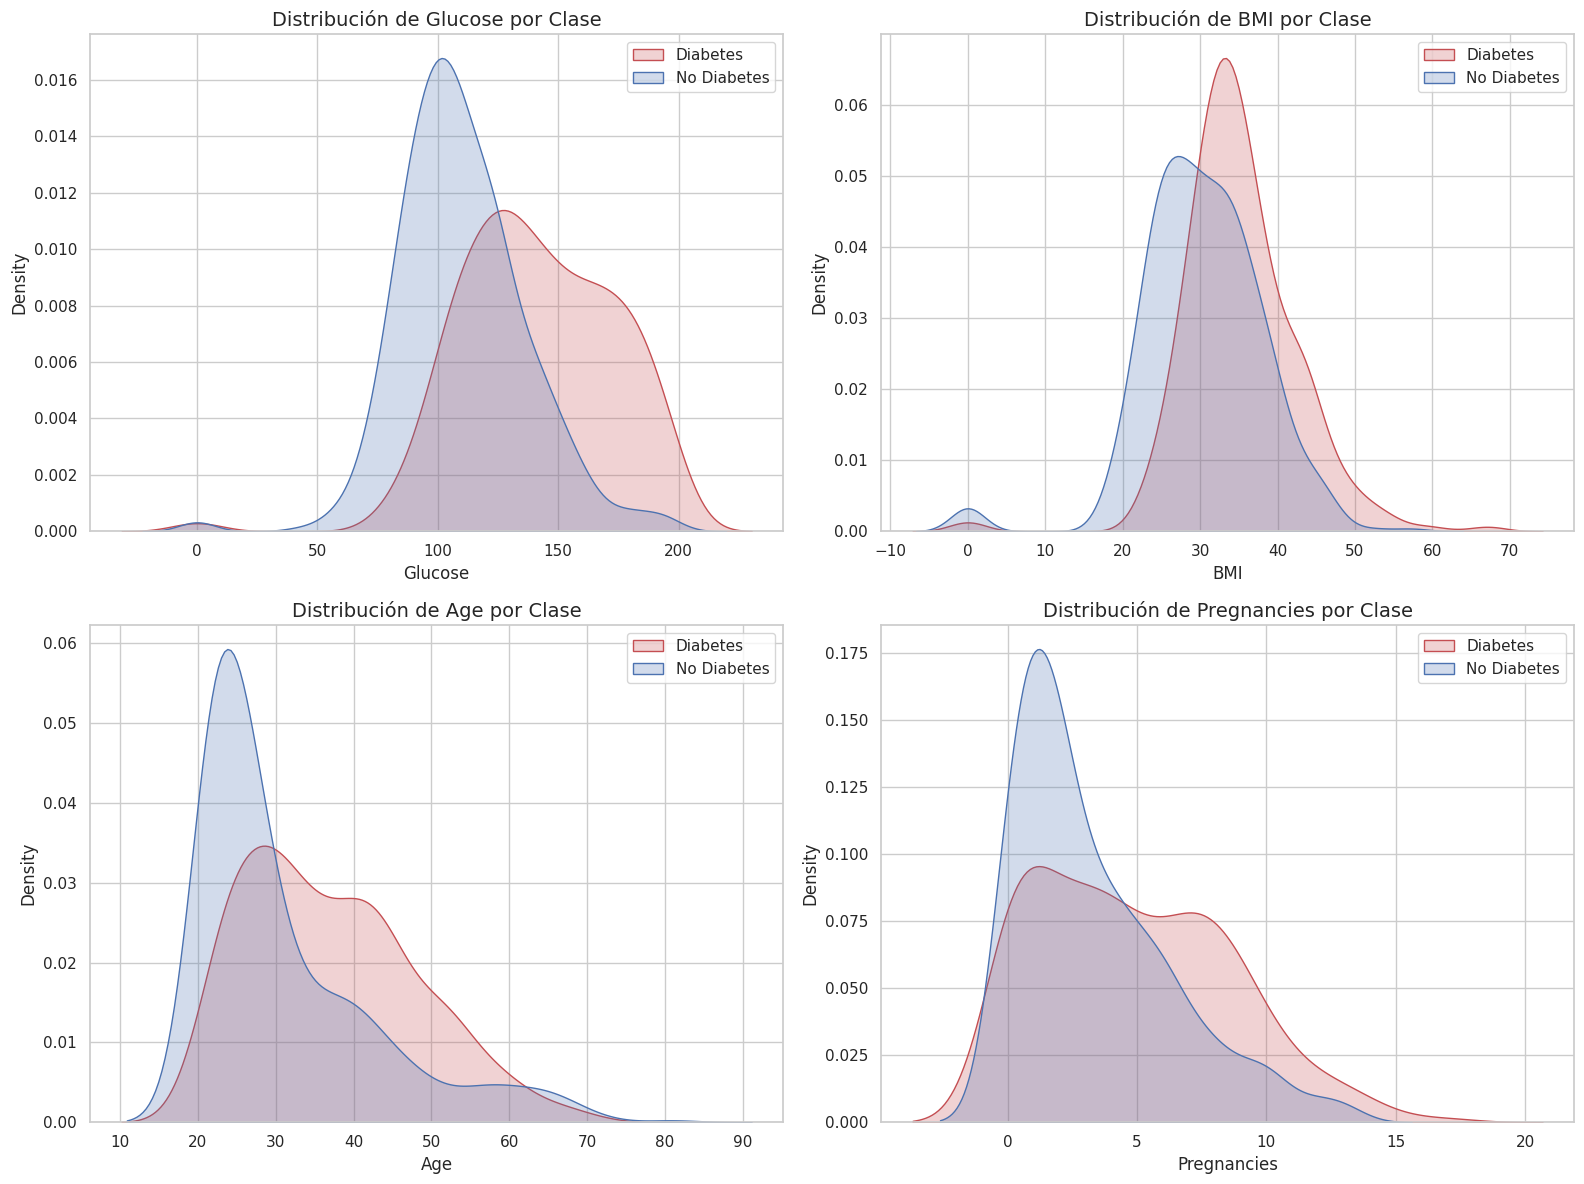

In [89]:

plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[column][df['Outcome'] == 1], fill=True, label="Diabetes", color="r")
    sns.kdeplot(df[column][df['Outcome'] == 0], fill=True, label="No Diabetes", color="b")
    plt.title(f"Distribución de {column} por Clase", fontsize=14)
    plt.legend()

plt.tight_layout()
plt.show()

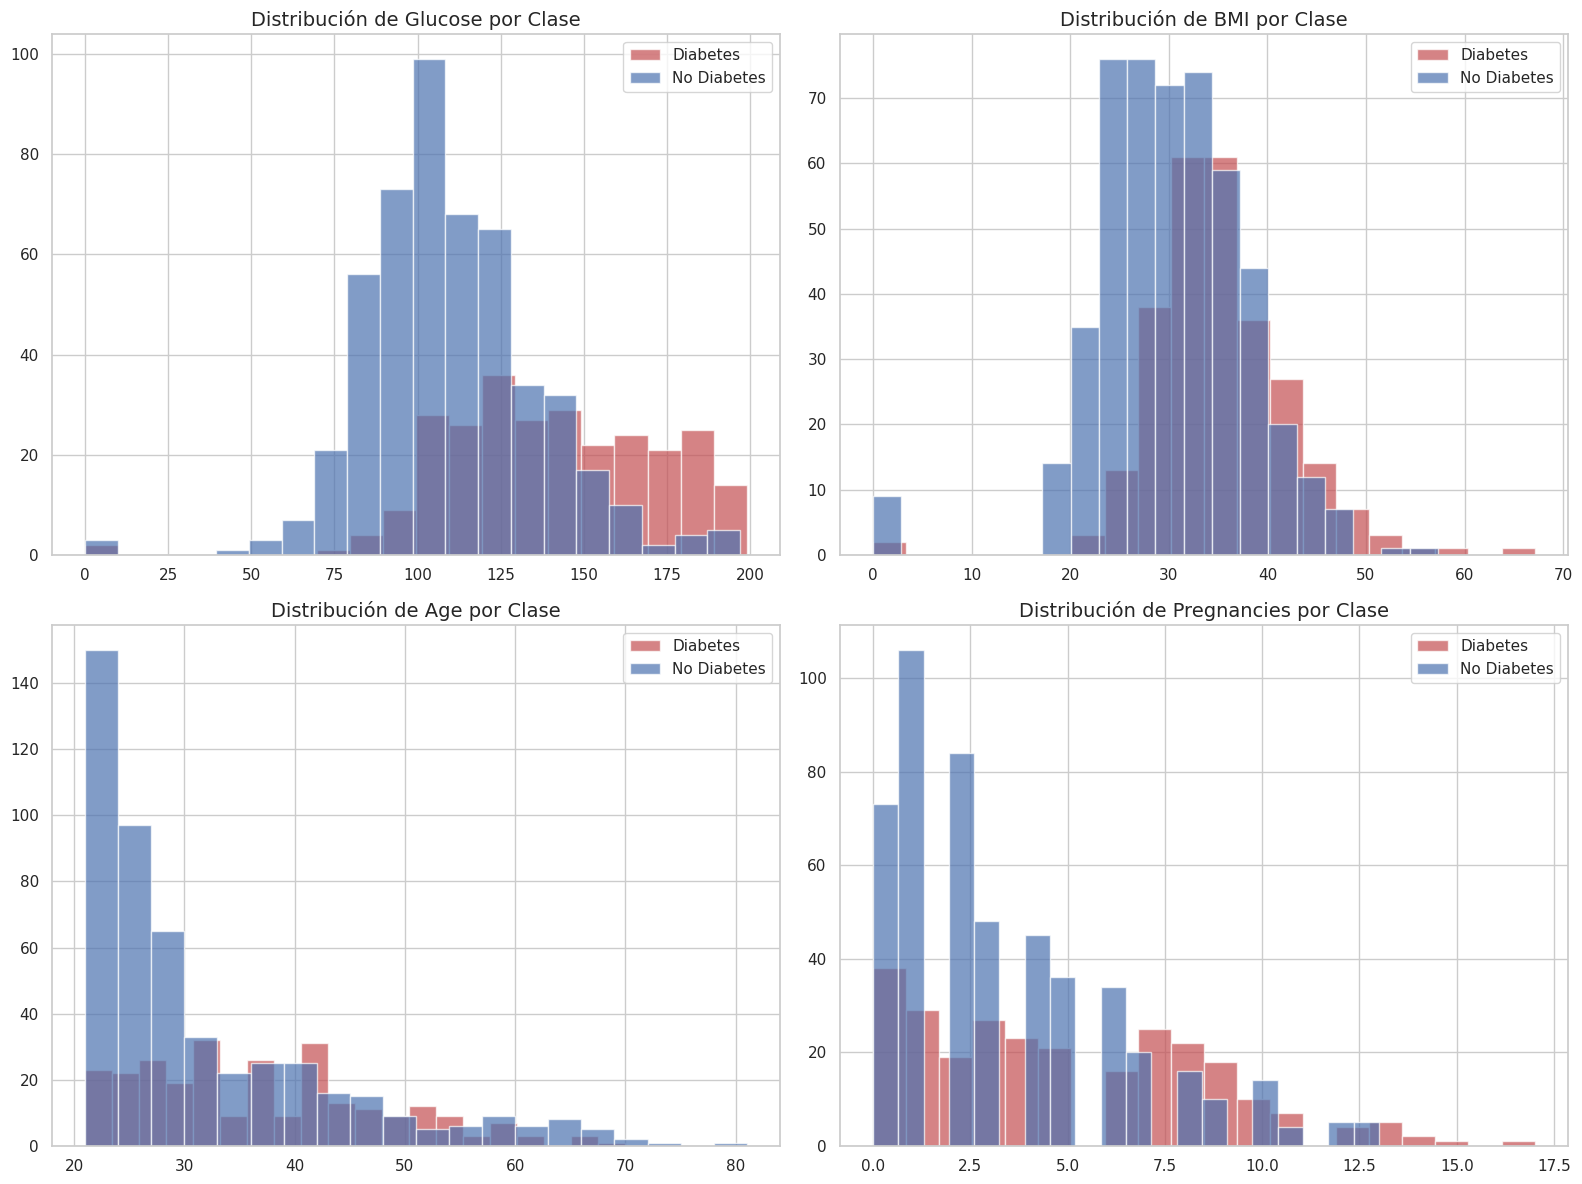

In [90]:
# Visualización alternativa usando matplotlib 
plt.figure(figsize=(16, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    diabetes = df[column][df['Outcome'] == 1]
    no_diabetes = df[column][df['Outcome'] == 0]
    plt.hist(diabetes, bins=20, alpha=0.7, label="Diabetes", color="r")
    plt.hist(no_diabetes, bins=20, alpha=0.7, label="No Diabetes", color="b")
    plt.title(f"Distribución de {column} por Clase", fontsize=14)
    plt.legend()

plt.tight_layout()
plt.show()

Selección de variables - Entrenamiento de modelo

In [91]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Mostrar dimensiones:

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

Dimensiones del conjunto de entrenamiento: (614, 8)
Dimensiones del conjunto de prueba: (154, 8)


In [93]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


In [94]:
y.unique()

array([1, 0])

Crear el modelo básico

In [95]:
# modelo
# default n_estimators=100
model = RandomForestClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

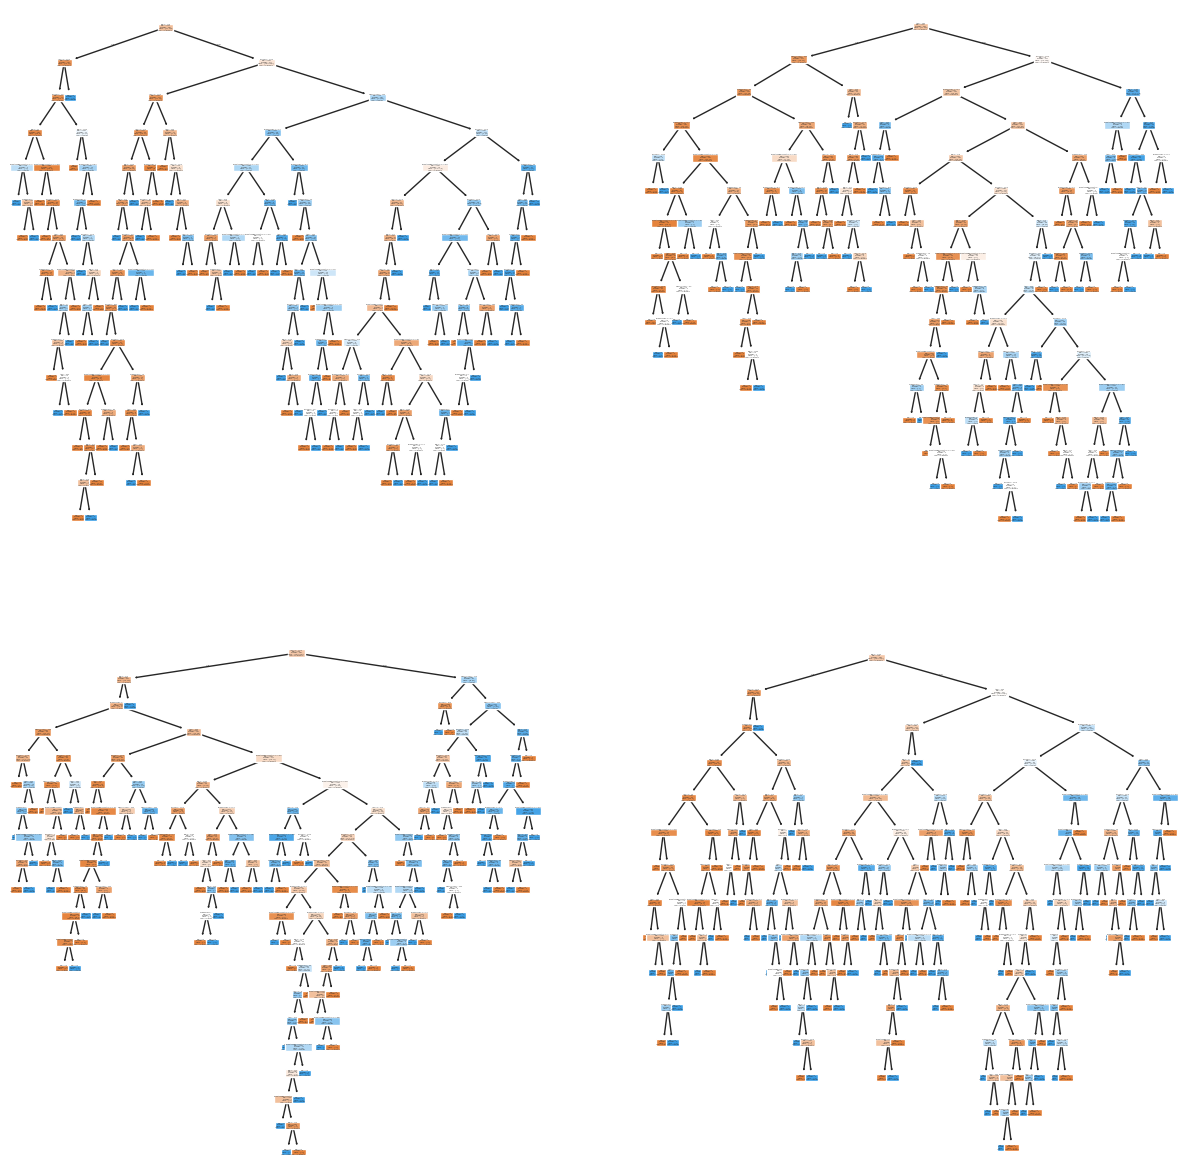

In [96]:
# visualizar el modelo

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
clases = ["No Diabetes", "Diabetes"]
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = clases, filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = clases, filled = True)

plt.show()

In [97]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [98]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [99]:
# metricas
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)

print("RMSE Test: ", rmse_test)

MSE Test:  0.24025974025974026
RMSE Test:  0.4901629731627434


In [100]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7597402597402597
F1 score Test:  0.7597402597402597
Precision Test:  0.7597402597402597
Recall Test:  0.7597402597402597
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


In [101]:
print(classification_report(y_test, y_pred_test, target_names=["No Diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No Diabetes       0.79      0.85      0.82       100
    Diabetes       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [102]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))